# Channing House Data

This is the `channing` dataset in the R package [`boot`](https://cran.r-project.org/web/packages/boot/index.html) (Canty & Ripley (2017)).
From the package description:
>Channing House is a retirement centre in Palo Alto, California.
>These data were collected between the opening of the house in 1964 until July 1, 1975.
>In that time 97 men and 365 women passed through the centre.
>For each of these, their age on entry and also on leaving or death was recorded.
>A large number of the observations were censored mainly due to the resident being alive on July 1, 1975 when the data was collected.
>Over the time of the study 130 women and 46 men died at Channing House.
>Differences between the survival of the sexes, taking age into account, was one of the primary concerns of this study.

These data feature *left truncation* because residents entered Channing House at different ages, and their lifetimes were not observed before entry.
This is a biased sampling problem since there are no observations on individuals who died before potentially entering Channing House.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", palette="colorblind", color_codes=True)

from survive import datasets
from survive.base import SurvivalData
from survive.nonparametric import KaplanMeier

## Loading the Dataset

The `channing()` function in the `survive.datasets` module loads a `pandas.DataFrame` containing the Channing House data.
The columns of this `DataFrame` are
* `sex` - Sex of each resident (male or female).
* `entry` - The resident's age (in months) on entry to the centre.
* `exit` - The age (in months) of the resident on death, leaving the centre or July 1, 1975 whichever event occurred first.
* `time` - The length of time (in months) that the resident spent at Channing House (this is `exit - entry`).
* `status` - Right-censoring indicator. 1 indicates that the resident died at Channing House, 0 indicates that they left the house prior to July 1, 1975 or that they were still alive and living in the centre at that date.

In [2]:
channing = datasets.channing()
channing.head()

,sex,entry,exit,time,status
resident,,,,,
0,male,782,909,127,1
1,male,1020,1128,108,1
2,male,856,969,113,1
3,male,915,957,42,1
4,male,863,983,120,1


## Exploratory Data Analysis

We use the Channing House data to create a `SurvivalData` object.

In [3]:
surv = SurvivalData(time="exit", entry="entry", status="status", group="sex",
                    df=channing)
print(surv)

female

 798+  804   804+  812+  819+  821+  822   824+  825+  829+  830   836+  840 
 845   848+  848+  854+  857+  860+  861   861+  868   870+  870+  872+  873 
 874+  875+  876+  882+  883   885   888+  891+  891+  892+  893+  895   895+
 897   897+  898+  899+  901   904+  905   905   905+  905+  905+  906+  908 
 908   911   912+  912+  912+  913+  914+  915   916+  917+  918+  919   919+
 922+  923   924+  925+  926   926+  926+  926+  927+  927+  927+  928   928+
 929+  930   930+  931   932   932+  932+  932+  933+  934   934+  935+  936 
 938+  938+  938+  939+  939+  940   940+  941   942+  943+  944   944   944+
 944+  944+  945+  946+  947+  948   948+  948+  950+  950+  952+  952+  953+
 953+  954   954+  955+  955+  955+  957+  957+  957+  958+  958+  959   959+
 959+  960+  961+  961+  962+  963   963+  964+  965+  965+  966   967+  969 
 969   970   970+  971+  971+  973+  973+  975   975+  975+  976   976+  976+
 976+  977+  977+  978   978+  979+  979+  979+  981+  9

In [4]:
display(surv.describe)

,total,events,censored
group,,,
female,364,129,235
male,97,46,51


We can see the effect of left truncation on the plot of the observed lifetimes: only a portion of each individual's actual lifespan is observed.
Moreover, many residents remained alive for the entire time Channing House was open from 1964 until the end of the study, and this is reflected in the band-like shape of the plot.

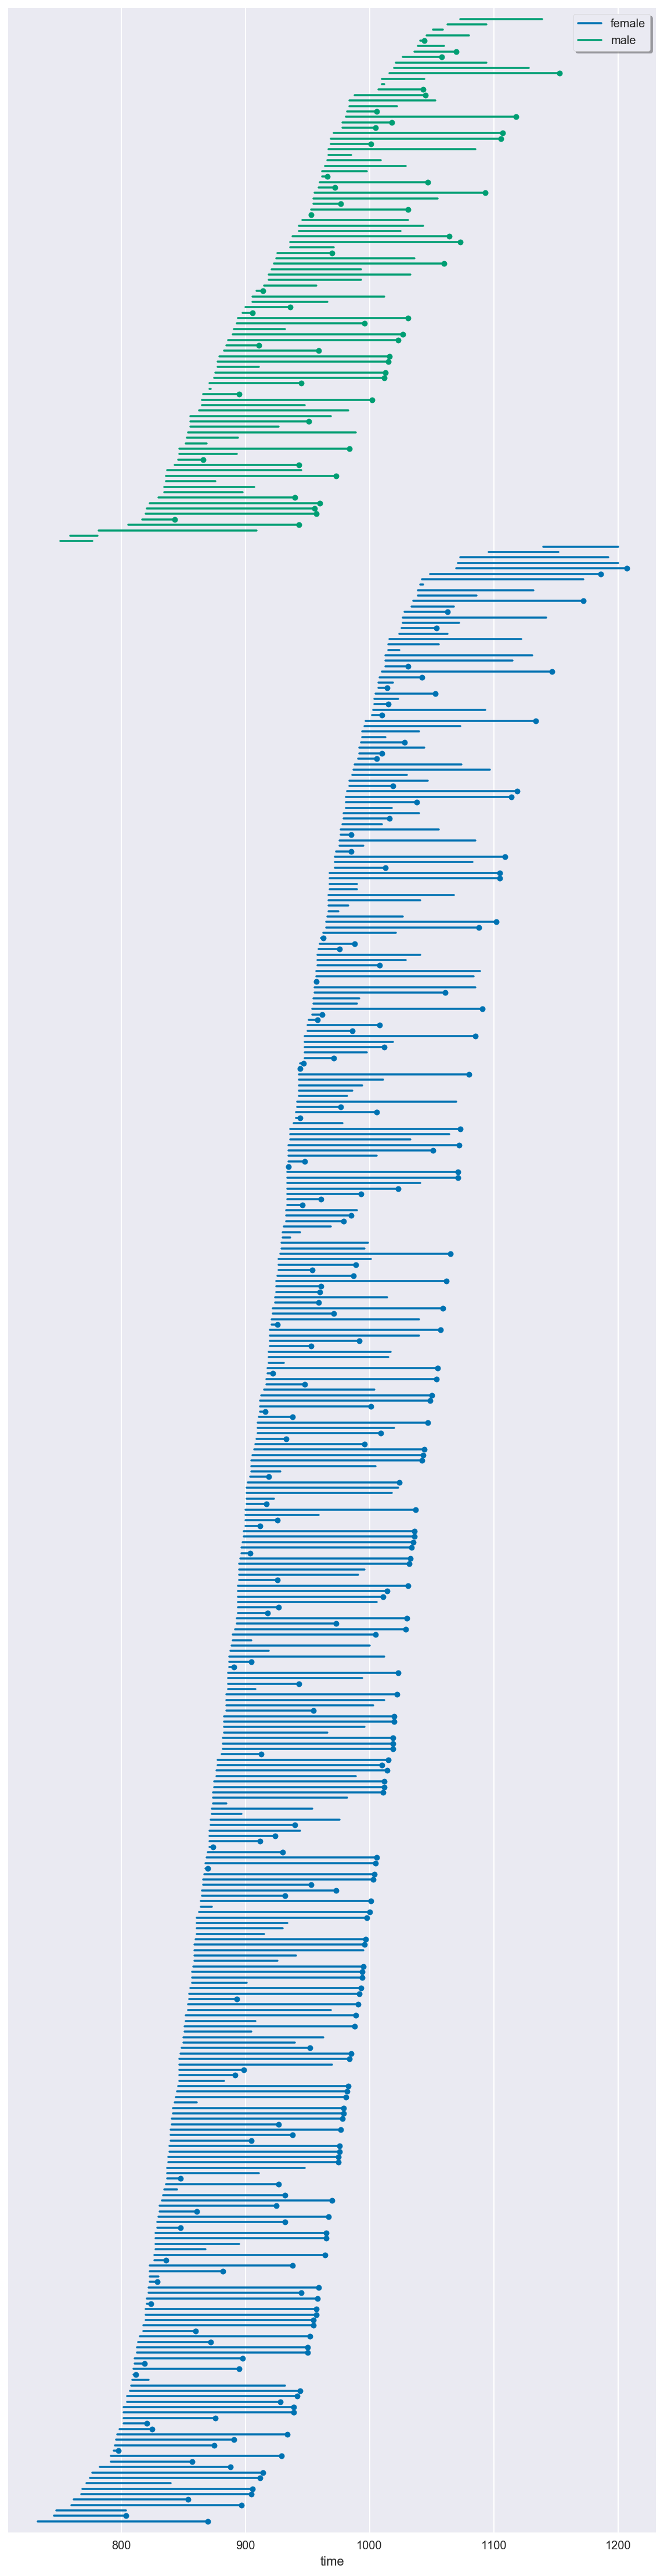

In [5]:
plt.figure(figsize=(10, 40))
surv.plot_lifetimes()
plt.show()
plt.close()

### Plotting the At-Risk Process

Due to the left-truncation, the risk set size initially increases as residents enter Channing House and then decreases as residents die or are censored.

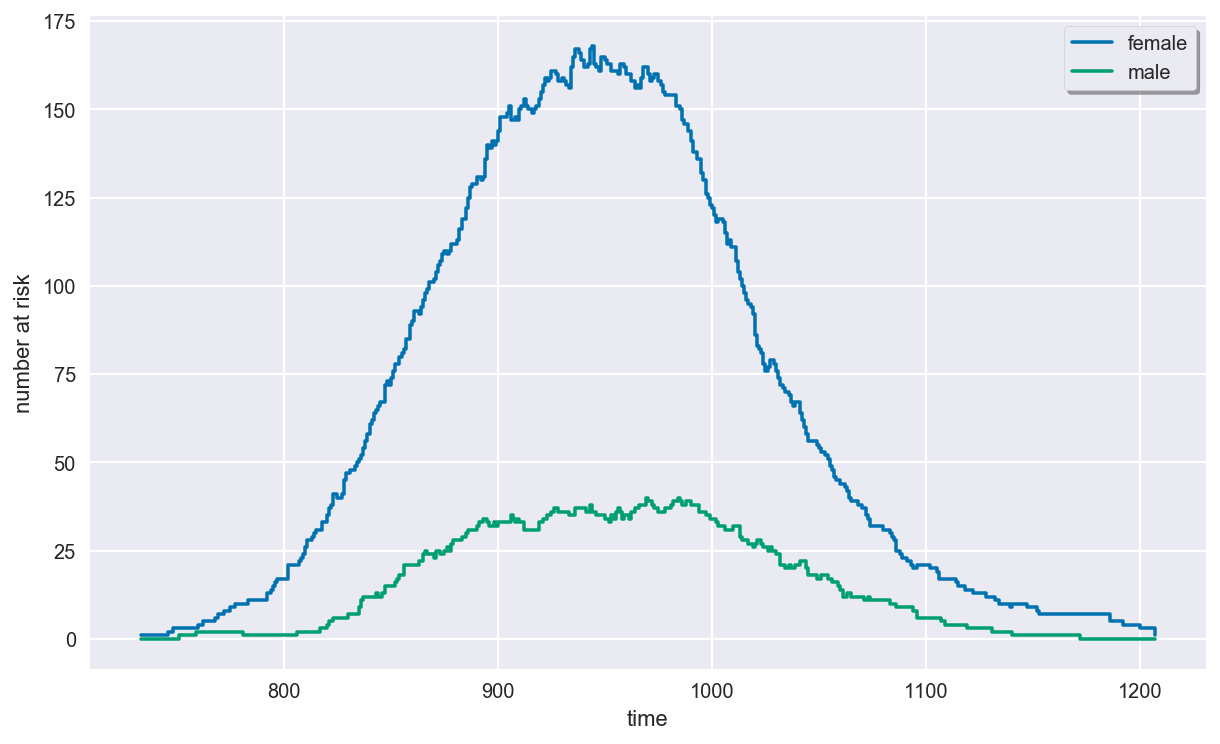

In [6]:
plt.figure(figsize=(10, 6))
surv.plot_at_risk()
plt.show()
plt.close()

## References

* Angelo Canty and Brian Ripley.
  boot: Bootstrap R (S-Plus) Functions.
  R package version 1.3-20 (2017).
  [CRAN](https://cran.r-project.org/web/packages/boot/index.html)